# 结合归一化和正则化来优化网络模型结构，观察对比loss结果

In [17]:
from sklearn.datasets import fetch_olivetti_faces

In [18]:
olivetti_faces = fetch_olivetti_faces(data_home="./face_data", shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


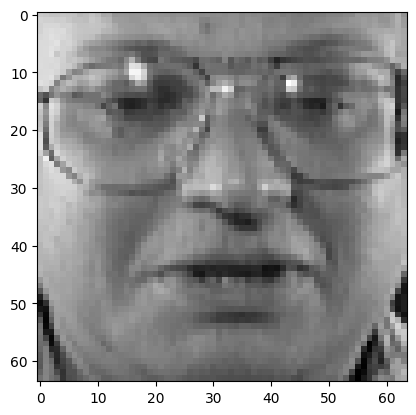

In [19]:
import matplotlib.pyplot as plt
face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [20]:
olivetti_faces.data[1]

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], shape=(4096,), dtype=float32)

In [21]:
import torch
import torch.nn as nn

In [22]:
images = torch.tensor(olivetti_faces.data, dtype=torch.float32)
targets = torch.tensor(olivetti_faces.target, dtype=torch.int64)

In [23]:
images.shape

torch.Size([400, 4096])

In [24]:
targets.shape

torch.Size([400])

In [25]:
dataset = [(img, lbl) for img, lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [26]:
dataloaders = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [27]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='mps')

In [28]:
# 多层神经网络模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.ReLU(),
     nn.Dropout(),
    nn.Linear(8192, 16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.ReLU(),
     nn.Dropout(),
    nn.Linear(1024, 40)
).to(device)

In [29]:
print(model)

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=8192, out_features=16384, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=16384, out_features=1024, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=1024, out_features=40, bias=True)
)


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [31]:
loss_hist = []
for i in range(10):
    for img, lbl in dataloaders:
        img, lbl = img.to(device), lbl.to(device)
        result = model(img)
        loss = criterion(result, lbl)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist.append(loss.item())
        print(f"epoch {i+1}, loss {loss.item():.2f}")

epoch 1, loss 3.76
epoch 1, loss 21.43
epoch 1, loss 9.66
epoch 1, loss 4.90
epoch 1, loss 3.94
epoch 1, loss 4.17
epoch 1, loss 4.00
epoch 1, loss 3.72
epoch 1, loss 3.67
epoch 1, loss 4.08
epoch 1, loss 3.88
epoch 1, loss 4.05
epoch 1, loss 3.61
epoch 1, loss 3.91
epoch 1, loss 3.94
epoch 1, loss 3.78
epoch 1, loss 3.88
epoch 1, loss 3.79
epoch 1, loss 3.69
epoch 1, loss 3.66
epoch 1, loss 3.96
epoch 1, loss 3.67
epoch 1, loss 3.74
epoch 1, loss 3.82
epoch 1, loss 3.74
epoch 1, loss 3.90
epoch 1, loss 3.77
epoch 1, loss 3.71
epoch 1, loss 3.70
epoch 1, loss 3.81
epoch 1, loss 3.73
epoch 1, loss 3.79
epoch 1, loss 3.73
epoch 1, loss 3.68
epoch 1, loss 3.72
epoch 1, loss 3.74
epoch 1, loss 3.75
epoch 1, loss 3.71
epoch 1, loss 3.73
epoch 1, loss 3.70
epoch 2, loss 3.70
epoch 2, loss 3.67
epoch 2, loss 3.80
epoch 2, loss 3.78
epoch 2, loss 3.66
epoch 2, loss 3.77
epoch 2, loss 3.65
epoch 2, loss 3.66
epoch 2, loss 3.66
epoch 2, loss 3.77
epoch 2, loss 3.72
epoch 2, loss 3.60
epoch 2, lo

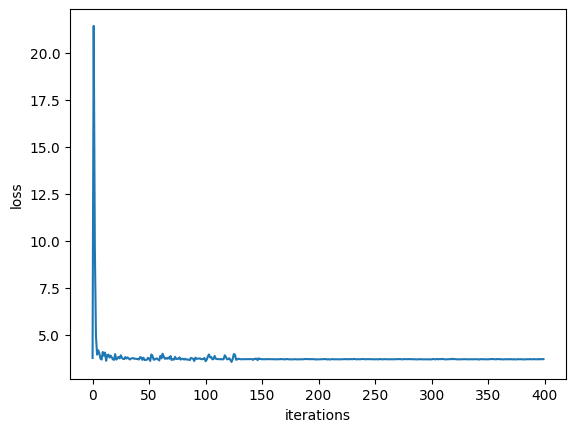

In [32]:
plt.plot(range(len(loss_hist)), loss_hist)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

In [34]:
# 多层神经网络模型
model2 = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(8192, 16384),
    nn.BatchNorm1d(16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
     nn.Dropout(),
    nn.Linear(1024, 40)
).to(device)

In [37]:
print(model2)

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=8192, out_features=16384, bias=True)
  (5): BatchNorm1d(16384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=16384, out_features=1024, bias=True)
  (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=1024, out_features=40, bias=True)
)


In [38]:
criterion2= nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)

In [42]:
loss_hist2 = []
for i in range(20):
    for img, lbl in dataloaders:
        img, lbl = img.to(device), lbl.to(device)
        result = model2(img)
        loss = criterion2(result, lbl)
        loss.backward()
        optimizer2.step()
        optimizer2.zero_grad()
        loss_hist2.append(loss.item())
        print(f"epoch {i+1}, loss {loss.item():.2f}")

epoch 1, loss 3.89
epoch 1, loss 3.90
epoch 1, loss 3.67
epoch 1, loss 3.99
epoch 1, loss 3.91
epoch 1, loss 3.17
epoch 1, loss 3.15
epoch 1, loss 3.96
epoch 1, loss 3.84
epoch 1, loss 3.37
epoch 1, loss 3.78
epoch 1, loss 3.63
epoch 1, loss 3.64
epoch 1, loss 3.19
epoch 1, loss 3.60
epoch 1, loss 4.01
epoch 1, loss 3.66
epoch 1, loss 3.16
epoch 1, loss 3.98
epoch 1, loss 3.76
epoch 1, loss 2.82
epoch 1, loss 3.11
epoch 1, loss 3.13
epoch 1, loss 2.89
epoch 1, loss 3.67
epoch 1, loss 3.73
epoch 1, loss 3.23
epoch 1, loss 3.58
epoch 1, loss 3.34
epoch 1, loss 2.42
epoch 1, loss 3.14
epoch 1, loss 2.83
epoch 1, loss 2.85
epoch 1, loss 3.28
epoch 1, loss 3.02
epoch 1, loss 2.77
epoch 1, loss 3.07
epoch 1, loss 2.82
epoch 1, loss 2.14
epoch 1, loss 2.60
epoch 2, loss 2.16
epoch 2, loss 3.68
epoch 2, loss 2.83
epoch 2, loss 2.08
epoch 2, loss 2.45
epoch 2, loss 2.36
epoch 2, loss 2.55
epoch 2, loss 3.35
epoch 2, loss 2.39
epoch 2, loss 1.96
epoch 2, loss 3.35
epoch 2, loss 2.49
epoch 2, los

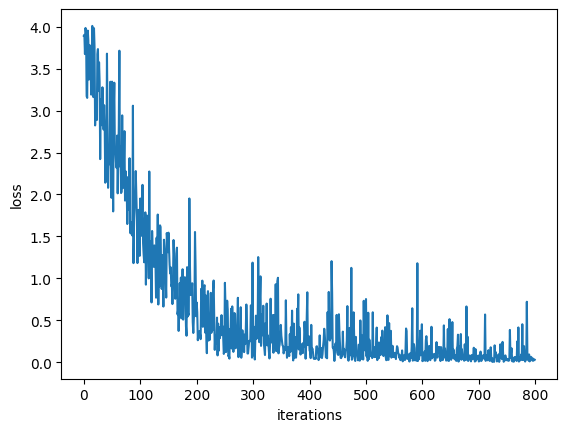

In [43]:
plt.plot(range(len(loss_hist2)), loss_hist2)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()